## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

train, test = keras.datasets.cifar10.load_data()

## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

Using TensorFlow backend.


In [2]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [3]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 128, 32], regulizer=l1, regulizer_ratio=1e-1):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=regulizer(regulizer_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=regulizer(regulizer_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [4]:
## 超參數設定
"""
Set your hyper-parameters
"""
epochs = 50
batch_size = 256
regulizer = [l1, l2, l1_l2]
regulizer_ratio = [1e-1, 1e-4, 1e-7, 1e-10]

In [5]:
results = {}
"""
Set your training loop
"""
for reg in regulizer:
    for reg_ra in regulizer_ratio:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(f'regulizer = {reg}, regulizer_ratio = {reg_ra}')
        model = build_mlp(input_shape=x_train.shape[1:], regulizer=reg, regulizer_ratio=reg_ra)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=0.01, nesterov=True, momentum=0.9)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        name_tag = f'regulizer = {reg}, regulizer_ratio = {reg_ra}'
        results[name_tag] = {'train-loss': train_loss, 'valid-loss': valid_loss, 
                             'train-acc': train_acc, 'valid-acc': valid_acc}

regulizer = <function l1 at 0x000001FBA1B8F840>, regulizer_ratio = 0.1
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                4128      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 1,643,498
Trainable params: 1,643,498
Non-trainable params: 0
_______________________________________________________

Epoch 47/50
50000/50000 [==============================] - 5s 109us/step - loss: 148.6111 - acc: 0.0991 - val_loss: 147.4600 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 6s 113us/step - loss: 148.5814 - acc: 0.0981 - val_loss: 146.7132 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 6s 112us/step - loss: 148.6065 - acc: 0.0994 - val_loss: 147.3928 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 6s 110us/step - loss: 148.5935 - acc: 0.0974 - val_loss: 147.2370 - val_acc: 0.1000
regulizer = <function l1 at 0x000001FBA1B8F840>, regulizer_ratio = 0.0001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
________________________

Epoch 48/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.4648 - acc: 0.5777 - val_loss: 1.7402 - val_acc: 0.4765
Epoch 49/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.4670 - acc: 0.5764 - val_loss: 1.6865 - val_acc: 0.5013
Epoch 50/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.4527 - acc: 0.5799 - val_loss: 1.6976 - val_acc: 0.4960
regulizer = <function l1 at 0x000001FBA1B8F840>, regulizer_ratio = 1e-07
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
________________________________________________

50000/50000 [==============================] - 5s 104us/step - loss: 0.5973 - acc: 0.7855 - val_loss: 1.9537 - val_acc: 0.5082
Epoch 50/50
50000/50000 [==============================] - 5s 104us/step - loss: 0.5894 - acc: 0.7899 - val_loss: 1.8068 - val_acc: 0.5233
regulizer = <function l2 at 0x000001FBA1B8FBF8>, regulizer_ratio = 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                4128      
_________________________________________________________________
out

50000/50000 [==============================] - 5s 102us/step - loss: 2.1483 - acc: 0.1840 - val_loss: 2.1314 - val_acc: 0.1889
regulizer = <function l2 at 0x000001FBA1B8FBF8>, regulizer_ratio = 0.0001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                4128      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 1,643,498
Trainable params: 1,643,498
Non-trainable params:

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.9231 - acc: 0.3070 - val_loss: 1.8109 - val_acc: 0.3699
Epoch 2/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.6887 - acc: 0.4007 - val_loss: 1.6213 - val_acc: 0.4219
Epoch 3/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.5932 - acc: 0.4335 - val_loss: 1.6777 - val_acc: 0.3890
Epoch 4/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.5250 - acc: 0.4569 - val_loss: 1.5192 - val_acc: 0.4601
Epoch 5/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.4750 - acc: 0.4767 - val_loss: 1.5206 - val_acc: 0.4623
Epoch 6/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.4339 - acc: 0.4917 - val_loss: 1.5213 - val_acc: 0.4681
Epoch 7/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.3927 - acc: 0.5061 - val_loss: 1.5677 - 

Epoch 2/50
50000/50000 [==============================] - 6s 112us/step - loss: 148.3665 - acc: 0.0965 - val_loss: 146.7653 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 113us/step - loss: 148.2882 - acc: 0.0982 - val_loss: 148.0707 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 113us/step - loss: 148.2681 - acc: 0.0998 - val_loss: 145.8709 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 112us/step - loss: 148.2372 - acc: 0.0993 - val_loss: 147.8239 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 113us/step - loss: 148.1825 - acc: 0.0972 - val_loss: 146.9454 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 112us/step - loss: 148.1823 - acc: 0.0957 - val_loss: 148.9705 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 6s 113us/step - loss: 148.1490 - acc: 0.0962 - val_loss: 146.7902 - val_acc: 0.1000
Epoch 

Epoch 2/50
50000/50000 [==============================] - 6s 117us/step - loss: 5.5171 - acc: 0.3733 - val_loss: 4.3465 - val_acc: 0.3405
Epoch 3/50
50000/50000 [==============================] - 6s 116us/step - loss: 3.4954 - acc: 0.3904 - val_loss: 3.2085 - val_acc: 0.3138
Epoch 4/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.5864 - acc: 0.3996 - val_loss: 2.3759 - val_acc: 0.3851
Epoch 5/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.1716 - acc: 0.4081 - val_loss: 2.1537 - val_acc: 0.3609
Epoch 6/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.9784 - acc: 0.4150 - val_loss: 2.0044 - val_acc: 0.3749
Epoch 7/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.8790 - acc: 0.4235 - val_loss: 1.9678 - val_acc: 0.3953
Epoch 8/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.8393 - acc: 0.4252 - val_loss: 1.8333 - val_acc: 0.4111
Epoch 9/50
50000/50000 [==========

Epoch 3/50
50000/50000 [==============================] - 6s 112us/step - loss: 3.4952 - acc: 0.3936 - val_loss: 2.9102 - val_acc: 0.3994
Epoch 4/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.5755 - acc: 0.4070 - val_loss: 2.3399 - val_acc: 0.3966
Epoch 5/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.1665 - acc: 0.4112 - val_loss: 2.0090 - val_acc: 0.4290
Epoch 6/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.9668 - acc: 0.4237 - val_loss: 1.9239 - val_acc: 0.4198
Epoch 7/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.8815 - acc: 0.4228 - val_loss: 1.8922 - val_acc: 0.4054
Epoch 8/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.8400 - acc: 0.4273 - val_loss: 1.8285 - val_acc: 0.4268
Epoch 9/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.8073 - acc: 0.4331 - val_loss: 1.8003 - val_acc: 0.4335
Epoch 10/50
50000/50000 [=========

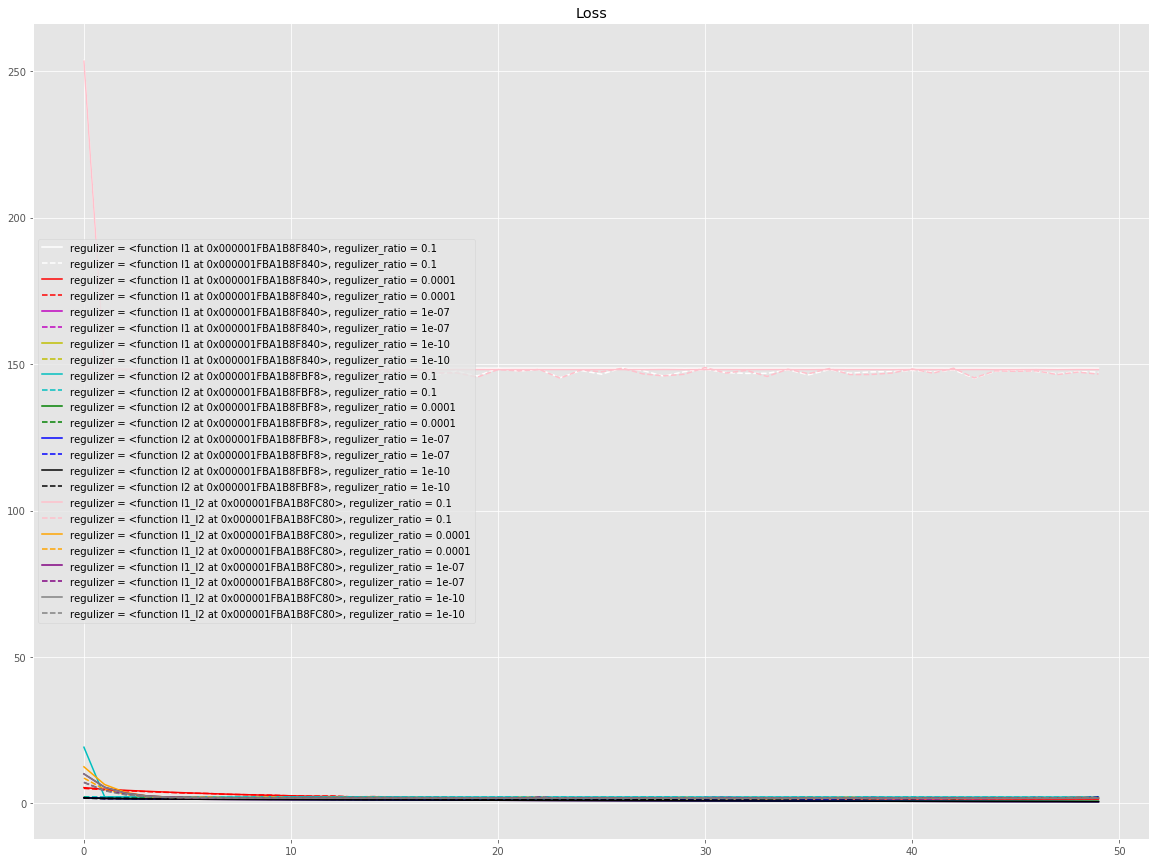

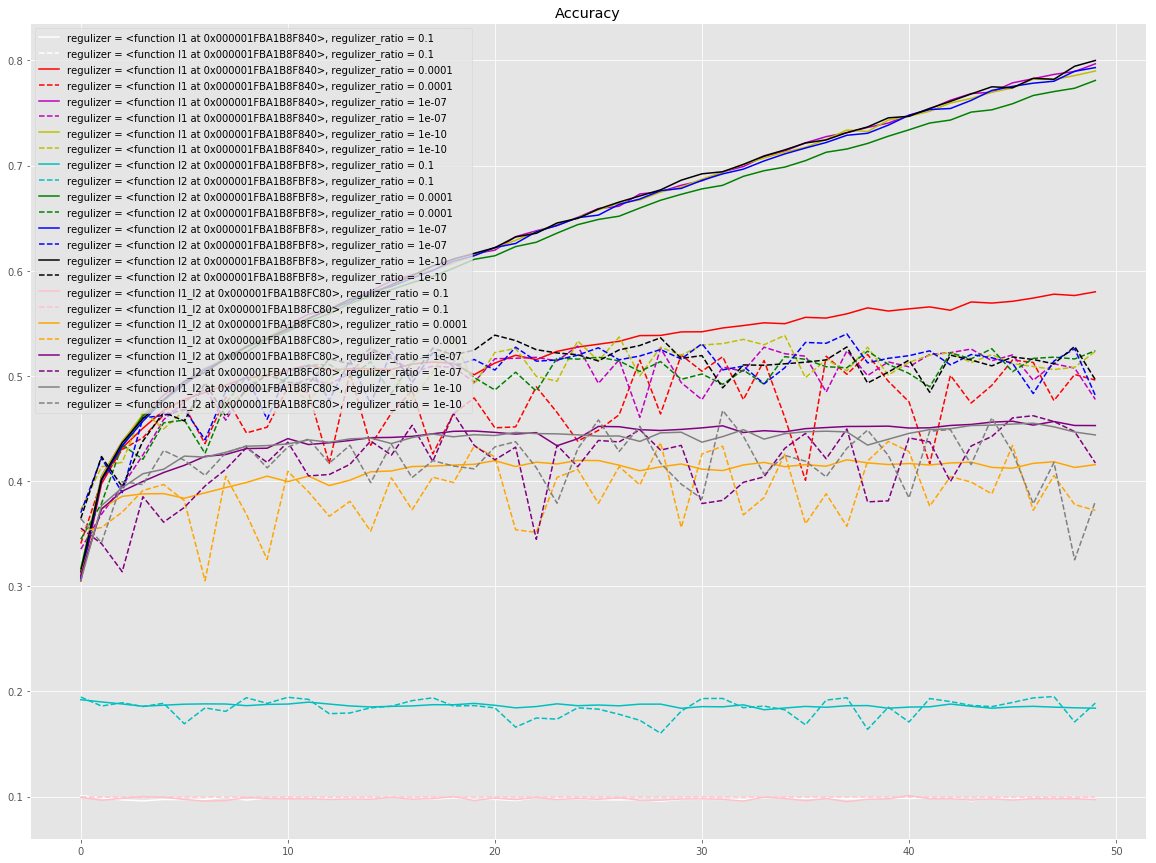

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
plot the results
"""
plt.style.use('ggplot')
color_bar = ['w', 'r', 'm', 'y' ,'c', 'g', 'b', 'k', 'pink', 'orange', 'purple', 'gray']

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()